In [1]:
from biological_fuzzy_logic_networks.DREAM.DREAMBioFuzzNet import DREAMBioFuzzNet
from biological_fuzzy_logic_networks.biofuzznet import BioFuzzNet
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import log

/dccstor/ipc1/.conda/envs/biofuzznet2/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
class HillTransferFunction(torch.nn.Module):
    """Apply a Hill transformation on 1D input"""

    def __init__(self, K=0.5, n=2):
        """
        Initialise the parameters if the transfer functino
        """
        torch.nn.Module.__init__(self)

        self.n = torch.nn.Parameter(torch.normal(mean=log(n-1), std=0.4, size=(1,)))
        self.K = torch.nn.Parameter(torch.normal(mean=log(K), std=0.2, size=(1,)))

    def forward(self, x):
        """
        Tranforms a value through the transfer function
        Args:
            x = value to be transformed
        """
        # Hill function as in Eduati et al. Cancer Research 2017
        # https://doi.org/10.1158/0008-5472.CAN-17-0078
        K = torch.exp(self.K)  # Ensure non-negative parameters
        n = 1 + torch.exp(self.n)  # 1 + n to ensure n > 1
        x_min = 1 - x
        output = (x_min**n) / (K**n + x_min**n)
        # in the normalized_Hill branch we normalize the outputs
        output = output * (1 + K**n)
        self.output_value = 1 - output
        return self.output_value


In [3]:
hill = HillTransferFunction()

In [4]:
x = torch.rand(100)
with torch.no_grad():
    y = hill(x)

Text(0.5, 1.0, 'Hill function standard init')

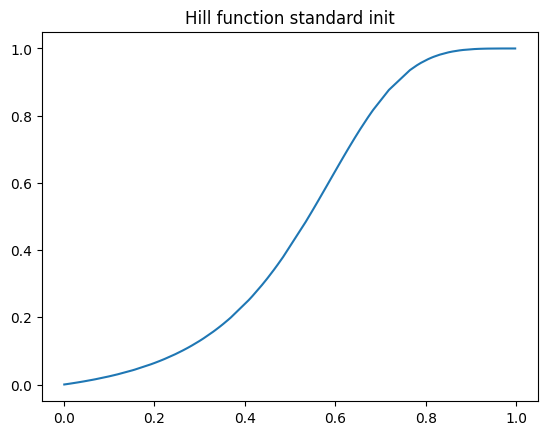

In [5]:
sns.lineplot(x=x, y=y)
plt.title("Hill function standard init")

In [6]:
log(1)

0.0

Text(0.5, 1.0, 'Hill function with n=1.1 and K=1')

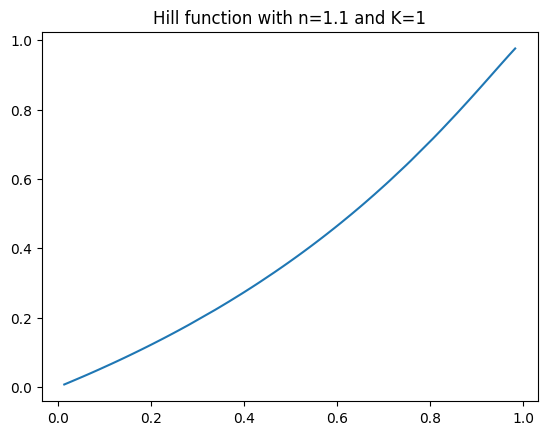

In [7]:
n=1.1
K=1
hill.n = torch.nn.Parameter(torch.tensor(log(n-1)))
hill.K = torch.nn.Parameter(torch.tensor(log(K)))
x = torch.rand(100)
with torch.no_grad():
    y = hill(x)
sns.lineplot(x=x, y=y)
plt.title(f"Hill function with n={n} and K={K}")

In [8]:
1+torch.exp(hill.n)

tensor(1.1000, grad_fn=<AddBackward0>)

In [9]:
torch.exp(hill.K)

tensor(1., grad_fn=<ExpBackward>)

In [10]:
bfn = DREAMBioFuzzNet.build_DREAMBioFuzzNet_from_file("/dccstor/ipc1/CAR/BFN/LiverDREAM_PKN.sif", n=1.1, K=1)
print(1+torch.exp(bfn.edges[('mek12', 'erk12')]["layer"].n))
print(torch.exp(bfn.edges[('mek12', 'erk12')]["layer"].K))

tensor([1.0854], grad_fn=<AddBackward0>)
tensor([0.8122], grad_fn=<ExpBackward>)


In [11]:
bfn = BioFuzzNet.build_BioFuzzNet_from_file("/dccstor/ipc1/CAR/BFN/LiverDREAM_PKN.sif", n=1.1, K=1)
print(1+torch.exp(bfn.edges[('mek12', 'erk12')]["layer"].n))
print(torch.exp(bfn.edges[('mek12', 'erk12')]["layer"].K))

tensor([1.2265], grad_fn=<AddBackward0>)
tensor([1.1326], grad_fn=<ExpBackward>)


In [12]:
bfn = BioFuzzNet(nodes=["A", "B"], edges={("A", "B"): 1}, n=1.1, K=1)
print(1+torch.exp(bfn.edges[('A', 'B')]["layer"].n))
print(torch.exp(bfn.edges[('A', 'B')]["layer"].K))

tensor([1.0745], grad_fn=<AddBackward0>)
tensor([1.0414], grad_fn=<ExpBackward>)
